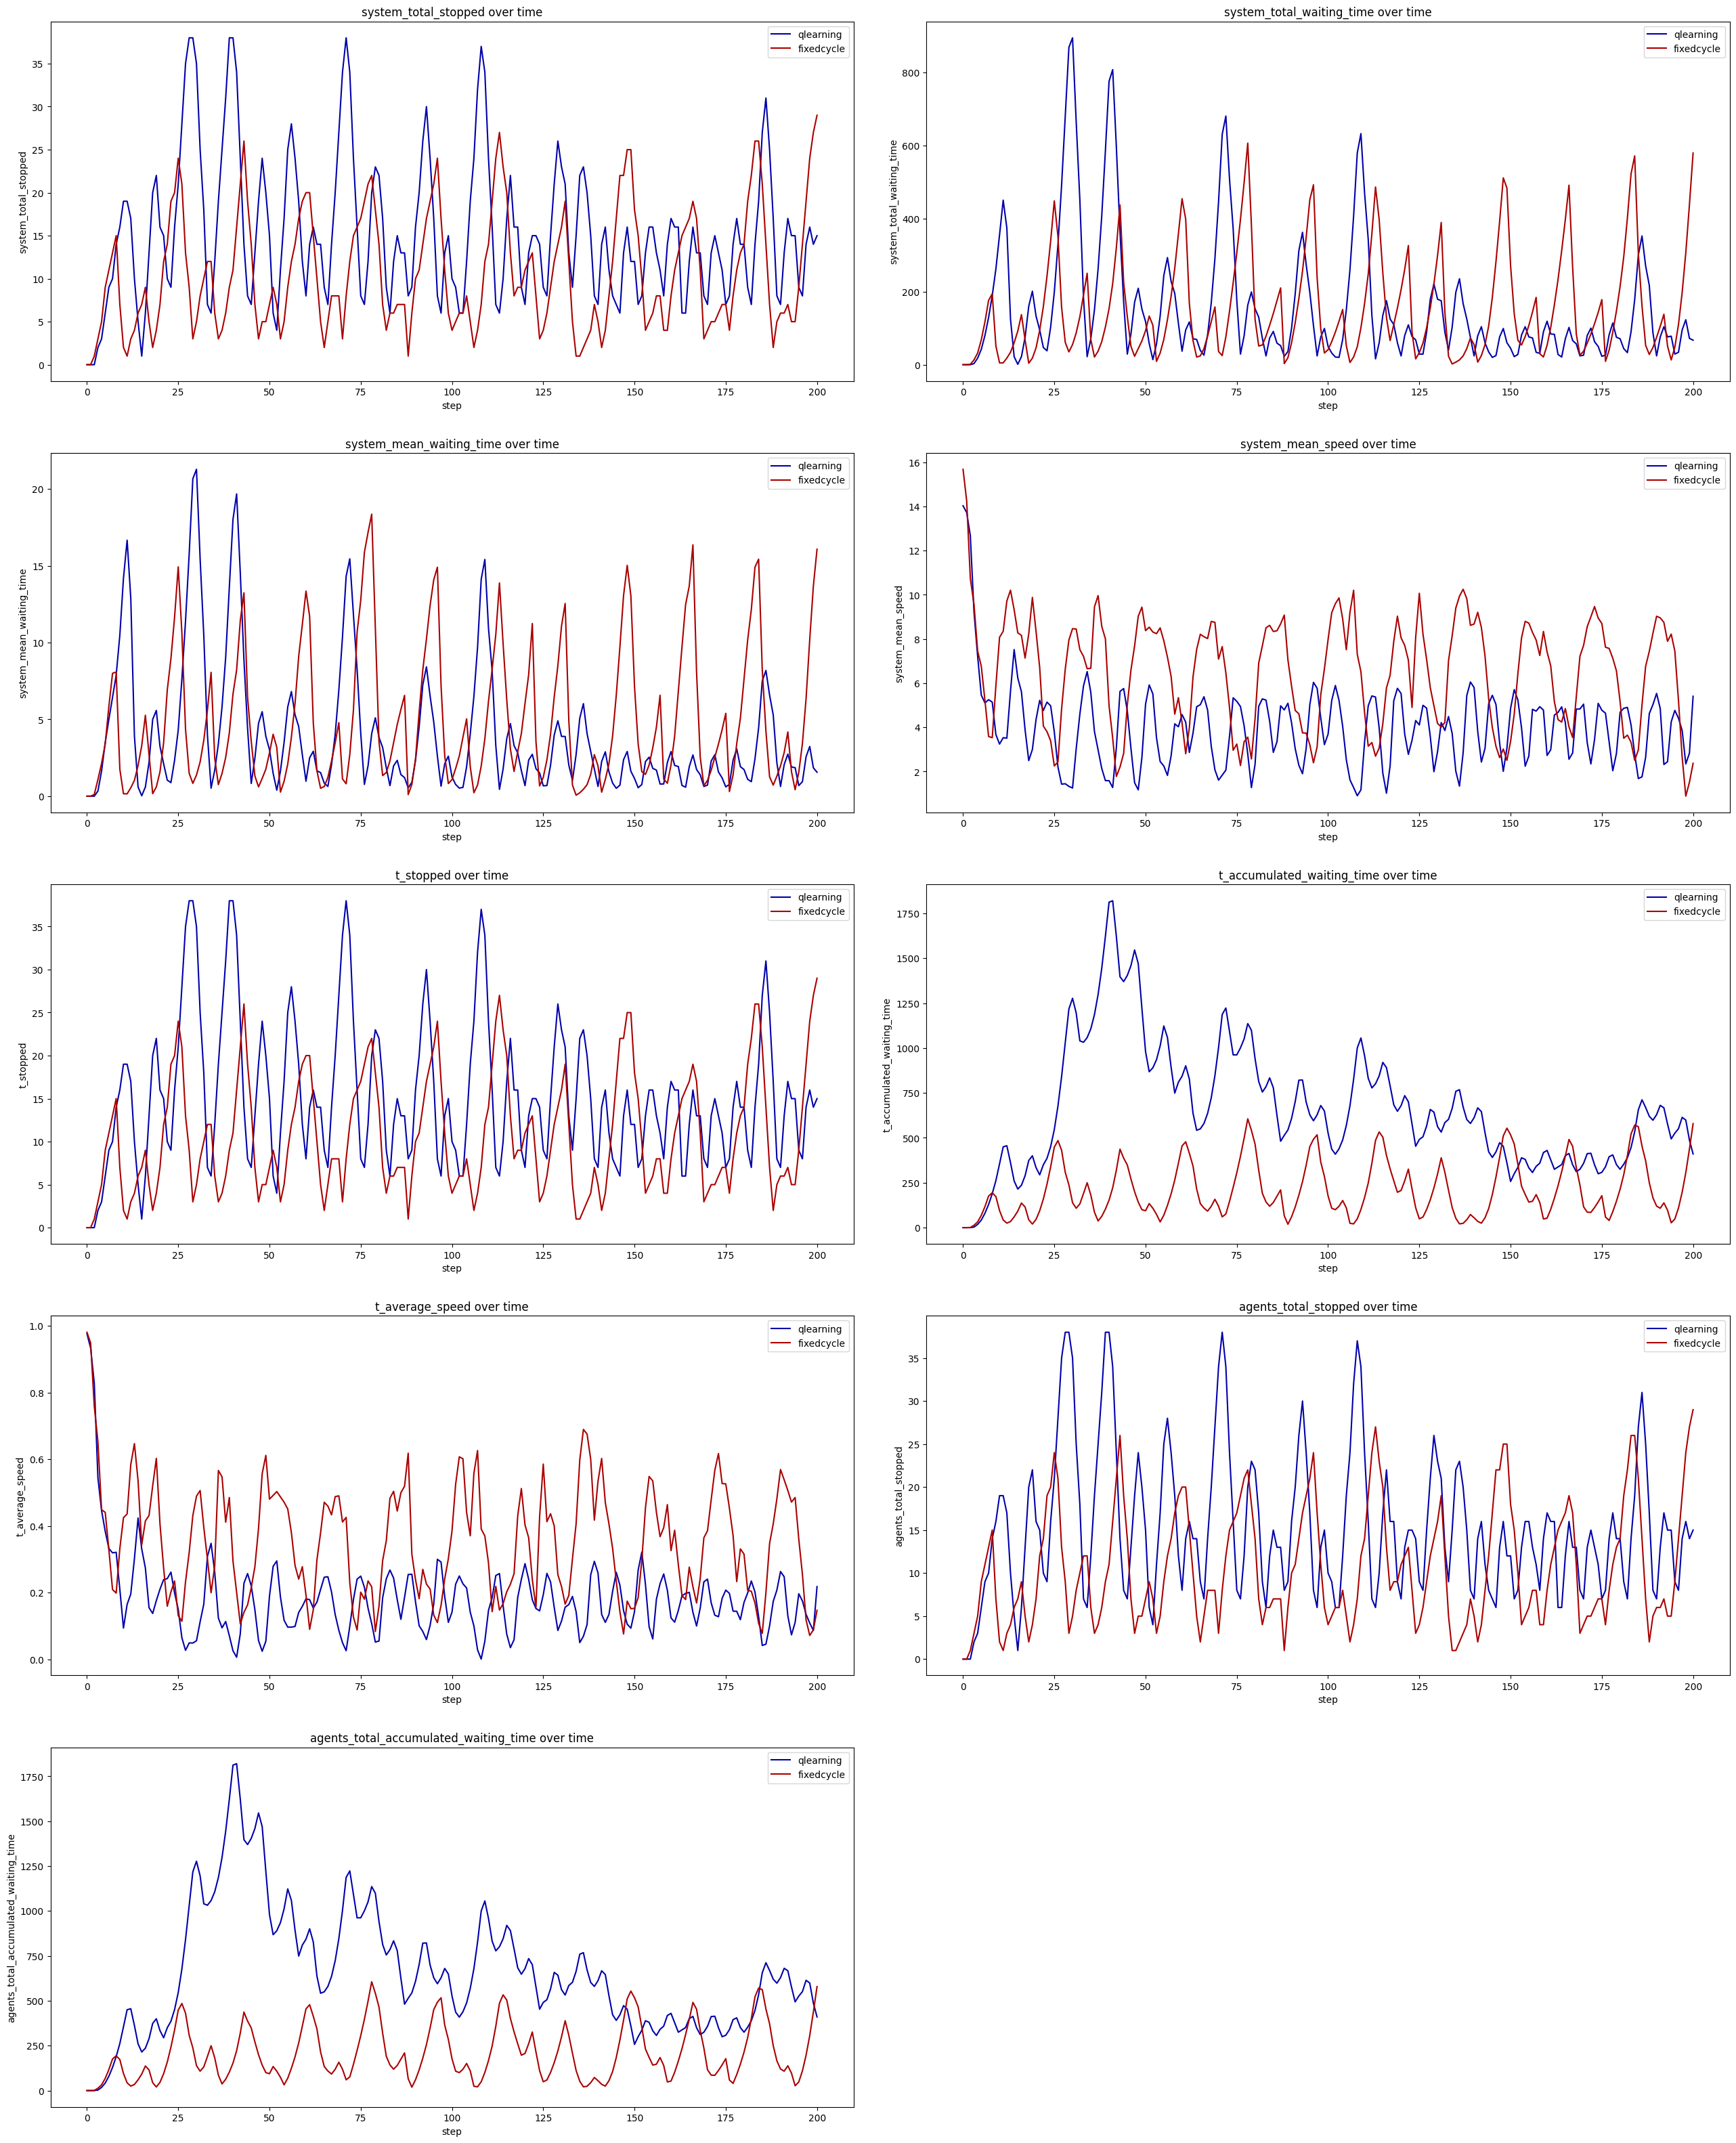

In [1]:
%matplotlib inline
from test2 import execution
import pylab as pl
from IPython import display
from matplotlib.transforms import Bbox

agents: dict[str, dict[str, str | bool | int]] = {
  'qlearning': {
    'color': '#0000aa',
    'fixed': False
  },
  'fixedcycle': {
    'color': '#aa0000',
    'fixed': True
  }
}
metrics: dict[str, dict[str, list | pl.Axes]] = {
  # 'step': {},
  'system_total_stopped': {},
  'system_total_waiting_time': {},
  'system_mean_waiting_time': {},
  'system_mean_speed': {},
  't_stopped': {},
  't_accumulated_waiting_time': {},
  't_average_speed': {},
  'agents_total_stopped': {},
  'agents_total_accumulated_waiting_time': {}
}
num_metrics = len(metrics)
plots_row_length = num_metrics // 2 + num_metrics % 2
plots_col_length = 2

figure = pl.figure()
figure.set_figheight(plots_row_length * 8)
figure.set_figwidth(32)
gridspec = figure.add_gridspec(plots_row_length, plots_col_length * 2)

for metric in metrics:
  metrics[metric] = { agent: [] for agent in agents }
  index = list(metrics.keys()).index(metric)
  col_index = index % 2 * 2
  metrics[metric]['plot'] = figure.add_subplot(gridspec[index // 2, col_index:(col_index + 2)])
  metrics[metric]['plot'].set_title(f'{metric} over time')
  metrics[metric]['plot'].set_xlabel('step')
  metrics[metric]['plot'].set_ylabel(metric)

def updateMetrics(name: str, info: dict[str, int | float]):
  for metric in metrics:
    metrics[metric][name].append(info[metric])
    # metrics[metric]['plot'].plot(metrics[metric][name], color=color)
  # pl.savefig('plot.png')
  # display.clear_output(wait=True)
  # display.display(pl.gcf())
  # display.display(display.Image(filename='plot.png'))

for agent in agents:
  execution(updateMetrics, agent, agents[agent]['fixed'])

for metric in metrics:
  for agent in agents:
    metrics[metric]['plot'].plot(metrics[metric][agent], color=agents[agent]['color'])[0].set_label(agent)
    metrics[metric]['plot'].legend()
  bbox: Bbox = metrics[metric]['plot'].get_tightbbox()
  dpi = figure.get_dpi()
  bbox = Bbox.from_extents(bbox.x0 / dpi, bbox.y0 / dpi, bbox.xmax / dpi, bbox.ymax / dpi)
  pl.savefig(f'{metric}_plot.png', bbox_inches=bbox.expanded(1.01, 1.01))
  # display.clear_output(wait=True)
  # display.display(pl.gcf())

  # pl.close(figure)